In [1]:
%reload_ext autoreload
%autoreload 2

from glob import glob
from tqdm import tqdm

import numpy as np
from scipy import ndimage, spatial, optimize, signal

import openpyxl

import tomatomisc as tmisc
import logistic_models as LM

import matplotlib
from matplotlib import pylab as plt, font_manager as fm
import matplotlib.patheffects as pe

import matplotlib.cbook as cbook

import warnings
warnings.filterwarnings("ignore")

In [2]:
daltary_path = "sample_data/daltary.xlsx"
tomimaru_path = "sample_data/tomimaru.xlsx"
daltary      = tmisc.TomatoData(daltary_path)
tomimaru     = tmisc.TomatoData(tomimaru_path)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1558.79it/s]


In [3]:
Models  = LM.models()
RESULTS = []

for n,i in enumerate(Models.names):
    ff     = getattr(Models, i)
    result = tmisc.logistic_fit(ff, daltary.diameter)
    RESULTS.append(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 504.04it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 406.26it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 257.57it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 287.97it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 528.99it/s]


removing the folowing rows:  []


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 52.21it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 471.83it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 544.74it/s]


removing the folowing rows:  []


In [4]:
func_names = [r"$g(t,A,b,d)$",
              r"$g(-t,-A,b,d)$",
              r"$f_1( t, A,b,d,e)$",
              r"$f_2( t, A,b,d)$",
              r"$f_3( t, A,b,d)$",
              r"$f_1(-t,-A,b,d,e)$",
              r"$f_2(-t,-A,b,d)$",
              r"$f_3(-t,-A,b,d)$"]

ME       = np.asarray([i.ME  for i in RESULTS])
MSE      = np.asarray([i.MSE for i in RESULTS])

sortMASK = np.argsort(np.mean(ME, 1))[::-1]

Labels = np.asarray(func_names)[sortMASK]
MSE    = MSE[sortMASK]
ME     = ME[sortMASK]


ME_stats  = cbook.boxplot_stats(list(ME) ,labels=list(Labels))
MSE_stats = cbook.boxplot_stats(list(MSE),labels=list(Labels))

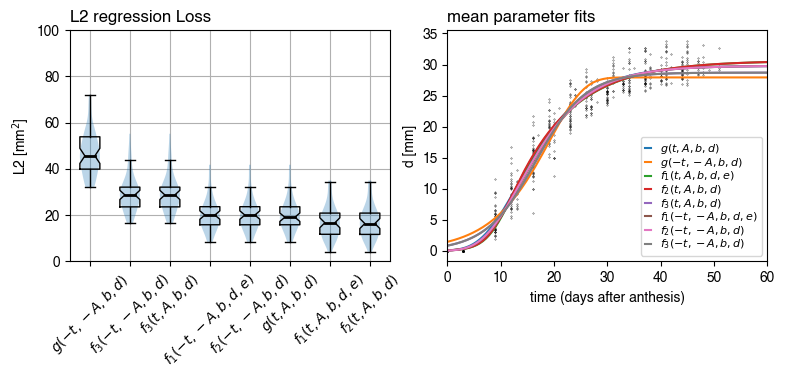

In [5]:
fontpath = "helvetica.ttf"
fprop    = fm.FontProperties(fname=fontpath)
plt.rcParams['font.family'] = fprop.get_name()

matplotlib.rcParams['font.family'] = 'Helvetica'

plt.figure(figsize=(9,3))

ax = plt.subplot(1,2,1)

ax.violinplot(list(MSE),
              showmeans=False,
              showmedians=False,
              showextrema=False,
              bw_method='silverman')

ax.bxp(MSE_stats, showfliers=False,
       shownotches=True,
       medianprops=dict(linestyle='-', linewidth=2, color='k'))

ax.set_axisbelow(True)
plt.xticks(rotation=45)
plt.title("L2 regression Loss",loc="left")
plt.ylabel(r"L2 [mm$^2$]")
plt.grid()
plt.ylim([0,100])

ax2 = plt.subplot(1, 2, 2)
for i in range(len(result.XE)):
    X = result.XE[i].astype(float)
    Y = result.YE[i].astype(float)
    plt.plot(X,Y,".k",markersize=0.5)

for n, i in enumerate(RESULTS):
    ax2.plot(i.XEF[0], i.Y_median, label=func_names[n])

plt.xlim([0,60])
plt.ylabel("d [mm]")
plt.xlabel("time (days after anthesis)")
plt.legend(loc="lower right", labelspacing=0.,
           handlelength=0.5, prop={'size': 8.})
plt.title("mean parameter fits",loc="left")
#plt.savefig(outdic+"L2.pdf",transparent=True,bbox_inches="tight")
plt.subplots_adjust(wspace=0.18)
plt.show()

In [6]:
Models  = LM.models()
RESULTS = []

for n,i in enumerate(Models.names):
    ff     = getattr(Models, i)
    result = tmisc.logistic_fit(ff, tomimaru.diameter)
    RESULTS.append(result)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 427.91it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 318.42it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 219.37it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 315.10it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 387.01it/s]


removing the folowing rows:  []


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 49.02it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 283.38it/s]


removing the folowing rows:  []


100%|████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 418.38it/s]

removing the folowing rows:  []


In [7]:
func_names = [r"$g(t,A,b,d)$",
              r"$g(-t,-A,b,d)$",
              r"$f_1( t, A,b,d,e)$",
              r"$f_2( t, A,b,d)$",
              r"$f_3( t, A,b,d)$",
              r"$f_1(-t,-A,b,d,e)$",
              r"$f_2(-t,-A,b,d)$",
              r"$f_3(-t,-A,b,d)$"]

ME       = np.asarray([i.ME  for i in RESULTS])
MSE      = np.asarray([i.MSE for i in RESULTS])

sortMASK = np.argsort(np.mean(ME, 1))[::-1]

Labels = np.asarray(func_names)[sortMASK]
MSE    = MSE[sortMASK]
ME     = ME[sortMASK]


ME_stats  = cbook.boxplot_stats(list(ME) ,labels=list(Labels))
MSE_stats = cbook.boxplot_stats(list(MSE),labels=list(Labels))

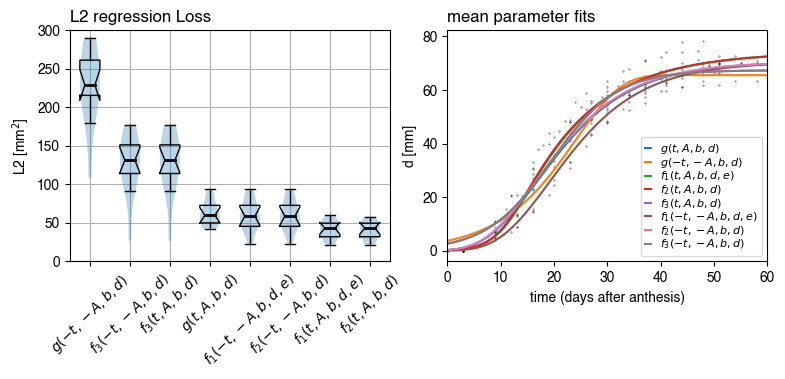

In [8]:
fontpath = "helvetica.ttf"
fprop    = fm.FontProperties(fname=fontpath)
plt.rcParams['font.family'] = fprop.get_name()

matplotlib.rcParams['font.family'] = 'Helvetica'

plt.figure(figsize=(9,3))

ax = plt.subplot(1,2,1)

ax.violinplot(list(MSE),
              showmeans=False,
              showmedians=False,
              showextrema=False,
              bw_method='silverman')

ax.bxp(MSE_stats, showfliers=False,
       shownotches=True,
       medianprops=dict(linestyle='-', linewidth=2, color='k'))

ax.set_axisbelow(True)
plt.xticks(rotation=45)
plt.title("L2 regression Loss",loc="left")
plt.ylabel(r"L2 [mm$^2$]")
plt.grid()
plt.ylim([0,300])

ax2 = plt.subplot(1, 2, 2)
for i in range(len(result.XE)):
    X = result.XE[i].astype(float)
    Y = result.YE[i].astype(float)
    plt.plot(X,Y,".k",markersize=0.5)

for n, i in enumerate(RESULTS):
    ax2.plot(i.XEF[0], i.Y_median, label=func_names[n])

plt.xlim([0,60])
plt.ylabel("d [mm]")
plt.xlabel("time (days after anthesis)")
plt.legend(loc="lower right", labelspacing=0.,
           handlelength=0.5, prop={'size': 8.})
plt.title("mean parameter fits",loc="left")
#plt.savefig(outdic+"L2.pdf",transparent=True,bbox_inches="tight")
plt.subplots_adjust(wspace=0.18)
plt.show()